In [33]:
#import data
import pandas as pd
import numpy as np
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [35]:
#change the labels into numbers
from sklearn.preprocessing import LabelEncoder

#quality_mean=df.iloc[:,-1].mean()
#I initially used mean value(about 5.6) as threshold,but the accuracy of classifiers is lower than those using 6 as threshold
y=(df['quality'].values>6)
X = df.iloc[:,0:-1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform([True, False])

array([1, 0], dtype=int64)

In [36]:
#split the dataset into trainig set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,test_size=0.30, random_state=0)

In [37]:
#classifier without PCA

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#linear regression
pipe_lin = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipe_lin.fit(X_train, y_train)
y_pred_lin=pipe_lin.predict(X_test)
y_pred_lin[y_pred_lin>=0.5],y_pred_lin[y_pred_lin<0.5] = 1, 0

#logistic regression
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)

#linear SVM 
pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel='linear', C=1.0, random_state=0))])
pipe_svm.fit(X_train, y_train)


#kernel SVM
pipe_svm1 = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel='rbf', random_state=0, gamma=0.20, C=1.0))])
pipe_svm1.fit(X_train, y_train)
print('Test Accuracy（linear regression）: %.3f' % accuracy_score(y_test, y_pred_lin))
print('Test Accuracy(logistic regression): %.3f' % pipe_lr.score(X_test, y_test))
print('Test Accuracy(svm): %.3f' % pipe_svm.score(X_test, y_test))
print('Test Accuracy(kernel svm): %.3f' % pipe_svm1.score(X_test, y_test))

Test Accuracy（linear regression）: 0.898
Test Accuracy(logistic regression): 0.898
Test Accuracy(svm): 0.885
Test Accuracy(kernel svm): 0.910


In [38]:
#classifier with PCA
from sklearn.decomposition import PCA

#logistic regression
pipe_lr_pca = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr_pca.fit(X_train, y_train)

#linear SVM 
pipe_svm_pca = Pipeline([('scl', StandardScaler()),
                         ('pca', PCA(n_components=2)),
                    ('clf', SVC(kernel='linear', C=1.0, random_state=0))])
pipe_svm_pca.fit(X_train, y_train)

#kernel SVM
pipe_svm1_pca = Pipeline([('scl', StandardScaler()),
                          ('pca', PCA(n_components=2)),
                    ('clf', SVC(kernel='rbf', random_state=0, gamma=0.20, C=1.0))])
pipe_svm1_pca.fit(X_train, y_train)
print('Test Accuracy(logistic regression): %.3f' % pipe_lr_pca.score(X_test, y_test))
print('Test Accuracy(svm): %.3f' % pipe_svm_pca.score(X_test, y_test))
print('Test Accuracy(kernel svm): %.3f' % pipe_svm1_pca.score(X_test, y_test))

Test Accuracy(logistic regression): 0.892
Test Accuracy(svm): 0.896
Test Accuracy(kernel svm): 0.892


In [39]:
 pipe_lr_pca.named_steps['pca']

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

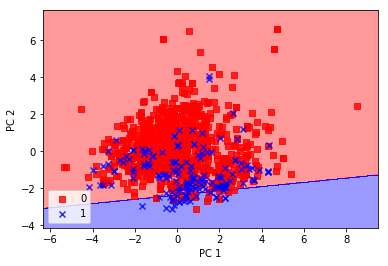

In [40]:
#decision region shows that the logistic regression classifier 
#with PCA fails to draw a clear boundary
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

X_train_std =  pipe_lr_pca.named_steps['scl'].fit_transform(X_train)
X_test_std = pipe_lr_pca.named_steps['scl'].transform(X_test)
X_train_pca =  pipe_lr_pca.named_steps['pca'].fit_transform(X_train_std)
X_test_pca =  pipe_lr_pca.named_steps['pca'].transform(X_test_std)

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
plot_decision_regions(X_train_pca, y_train, classifier=pipe_lr_pca.named_steps['clf'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()